# Capítulo 06 - Machine Learning
## KMeans - Agrupamento de Dados

## Importando bibliotecas ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Carregando a base de dados iris

In [2]:
iris = pd.read_csv("../arquivos/iris.csv")

In [7]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Separando os valores de dados e classes

In [4]:
X = iris.drop('Species',axis=1)
X[:10]

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [40]:
y = iris.Species
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

## Convertendo valores categórios de classe em numéricos

In [41]:
def converte_classe(l):
    if l == 'Iris-virginica':
        return 2
    elif l == 'Iris-setosa':
        return 0
    elif l == 'Iris-versicolor':
        return 1

In [42]:
y = y.apply(converte_classe)

In [43]:
y.value_counts('Species')

0    0.333333
1    0.333333
2    0.333333
Name: Species, dtype: float64

## Instânciando o Algoritmo K-means com 3 clusters ##

In [44]:
kmeans = KMeans(n_clusters = 3, init = 'random')

In [45]:
kmeans.fit(X)

KMeans(init='random', n_clusters=3)

## Centroids ##

In [46]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

## Tabela de distância ##

In [47]:
distance = kmeans.fit_transform(X)
distance

array([[0.14694217, 3.41925061, 5.0595416 ],
       [0.43816892, 3.39857426, 5.11494335],
       [0.41230086, 3.56935666, 5.27935534],
       [0.51883716, 3.42240962, 5.15358977],
       [0.19796969, 3.46726403, 5.10433388],
       [0.68380699, 3.14673162, 4.68148797],
       [0.41520116, 3.51650264, 5.21147652],
       [0.0599333 , 3.33654987, 5.00252706],
       [0.80099438, 3.57233779, 5.32798107],
       [0.36659514, 3.3583767 , 5.06790865],
       [0.48784424, 3.32449131, 4.89806763],
       [0.25138019, 3.31126872, 4.9966845 ],
       [0.49192682, 3.46661272, 5.19103612],
       [0.90906105, 3.90578362, 5.65173594],
       [1.02019214, 3.646649  , 5.10804455],
       [1.21309192, 3.49427881, 4.88564095],
       [0.66241377, 3.495248  , 5.03090587],
       [0.1509702 , 3.38444981, 5.02342022],
       [0.82848778, 3.11245944, 4.61792995],
       [0.39898872, 3.37738931, 4.97213426],
       [0.46172719, 3.07471224, 4.6955761 ],
       [0.33762701, 3.31506588, 4.9236821 ],
       [0.

In [48]:
distance[0]

array([0.14694217, 3.41925061, 5.0595416 ])

## Visualizando valores de distância para cada cluster ##

<IPython.core.display.Javascript object>


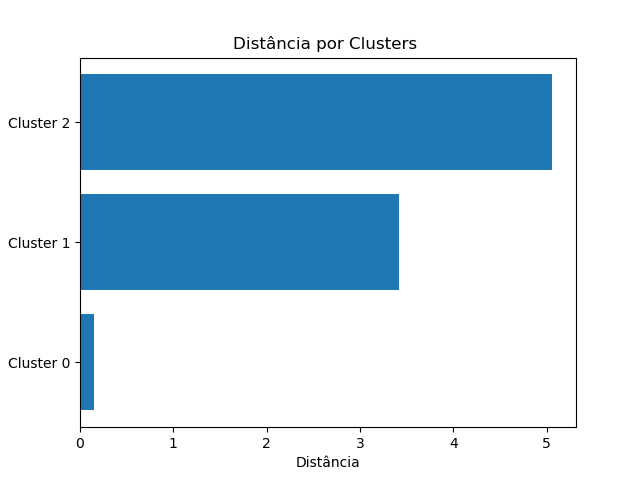

In [49]:
%matplotlib notebook
x = ['Cluster 0','Cluster 1','Cluster 2']
plt.barh(x,distance[0])
plt.xlabel('Distância')
plt.title('Distância por Clusters ')
plt.show()

## Imprimindo Rótulos ##

In [50]:
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

## Visualizando os Centroids ##

<IPython.core.display.Javascript object>


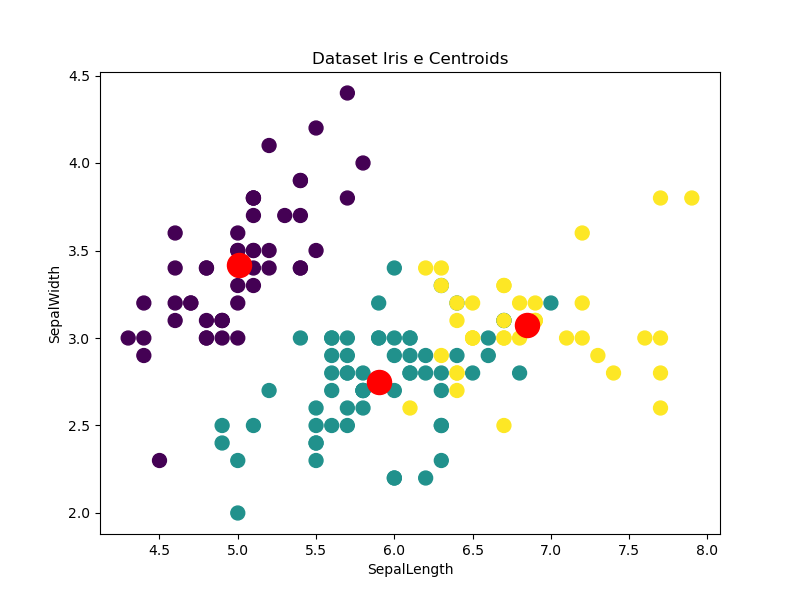

In [51]:
%matplotlib notebook
plt.figure(figsize=(8,6))
plt.scatter(X['SepalLength'], X['SepalWidth'], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.title('Dataset Iris e Centroids')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.show()

## Agrupando novos dados ##

In [52]:
data = [
        [ 4.12, 3.4, 1.6, 0.7],
        [ 5.2, 5.8, 5.2, 6.7],
        [ 3.1, 3.5, 3.3, 3.0]
    ]
kmeans.predict(data)

array([0, 2, 1])

## Visualizando os resultados ##

<IPython.core.display.Javascript object>


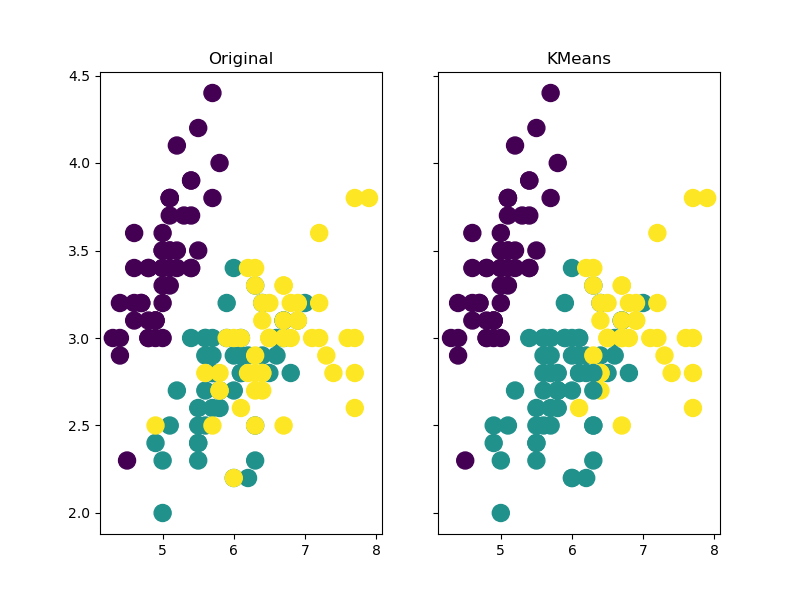

In [53]:
%matplotlib notebook
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,6))
ax1.set_title('Original')
ax1.scatter(X['SepalLength'], X['SepalWidth'],s=150,c=y)
ax2.set_title('KMeans')
ax2.scatter(X['SepalLength'], X['SepalWidth'],s=150,c=kmeans.labels_)

In [54]:
pd.crosstab(y,kmeans.labels_)

col_0,0,1,2
Species,,,
0,50,0,0
1,0,48,2
2,0,14,36


<IPython.core.display.Javascript object>


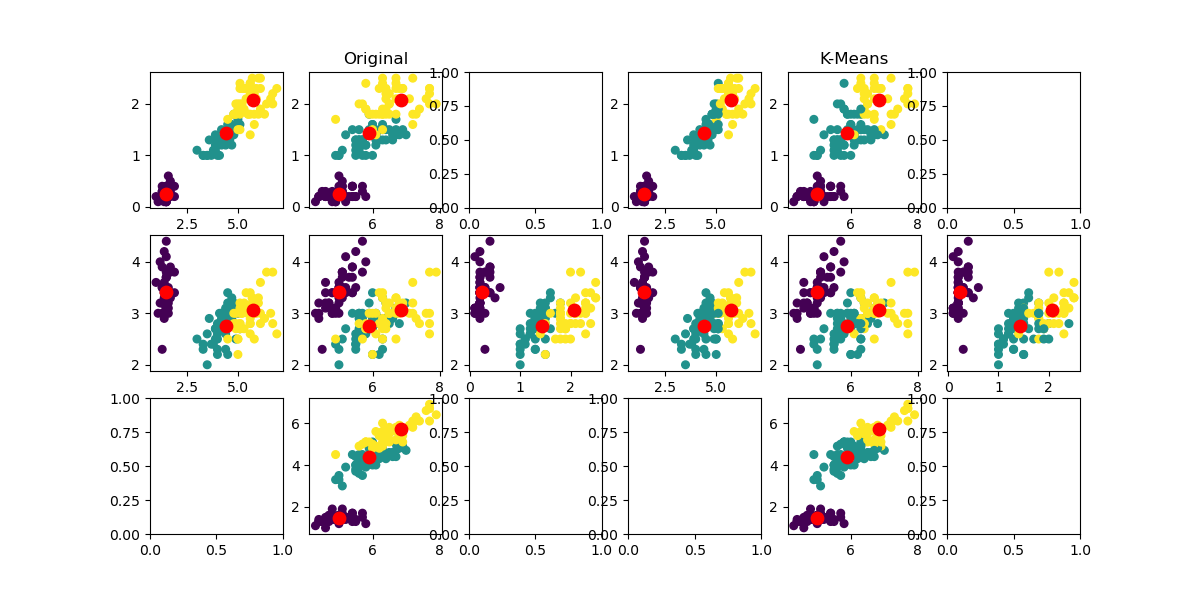

In [55]:
%matplotlib notebook

fig, ax = plt.subplots(3, 6, figsize = (12,6))
#Original

ax[0][0].scatter(X['PetalLength'], X['PetalWidth'],s=30,c=y)
ax[0][0].scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 80, c = 'red',label = 'Centroids')

ax[0][1].set_title('Original')
ax[0][1].scatter(X['SepalLength'], X['PetalWidth'],s=30,c=y)
ax[0][1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], s = 80, c = 'red',label = 'Centroids')

ax[1][0].scatter(X['PetalLength'], X['SepalWidth'],s=30,c=y)
ax[1][0].scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 1], s = 80, c = 'red',label = 'Centroids')


ax[1][1].scatter(X['SepalLength'], X['SepalWidth'],s=30,c=y)
ax[1][1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 80, c = 'red',label = 'Centroids')


ax[2][1].scatter(X['SepalLength'], X['PetalLength'],s=30,c=y)
ax[2][1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s = 80, c = 'red',label = 'Centroids')
#ax[2][1].xlabel('SepalLength')

ax[1][2].scatter(X['PetalWidth'], X['SepalWidth'],s=30,c=y)
ax[1][2].scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 1], s = 80, c = 'red',label = 'Centroids')

#K-Means
ax[0][3].scatter(X['PetalLength'], X['PetalWidth'],s=30,c=kmeans.labels_)
ax[0][3].scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 80, c = 'red',label = 'Centroids')

ax[0][4].set_title('K-Means')
ax[0][4].scatter(X['SepalLength'], X['PetalWidth'],s=30,c=kmeans.labels_)
ax[0][4].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], s = 80, c = 'red',label = 'Centroids')

ax[1][3].scatter(X['PetalLength'], X['SepalWidth'],s=30,c=kmeans.labels_)
ax[1][3].scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 1], s = 80, c = 'red',label = 'Centroids')

ax[1][4].scatter(X['SepalLength'], X['SepalWidth'],s=30,c=kmeans.labels_)
ax[1][4].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 80, c = 'red',label = 'Centroids')



ax[2][4].scatter(X['SepalLength'], X['PetalLength'],s=30,c=kmeans.labels_)
ax[2][4].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s = 80, c = 'red',label = 'Centroids')
#ax[2][4].xlabel('SepalLength')

ax[1][5].scatter(X['PetalWidth'], X['SepalWidth'],s=30,c=kmeans.labels_)
ax[1][5].scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 1], s = 80, c = 'red',label = 'Centroids')

plt.show()

In [56]:
pd.crosstab(y,labels)

col_0,0,1,2
Species,,,
0,50,0,0
1,0,48,2
2,0,14,36


## Estimando o valor do parametro K - Método Elbow

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1 680.8243999999996
2 152.36870647733915
3 78.94084142614601
4 57.34540931571815
5 46.55057267267267
6 39.266821514027406
7 34.299985543844244
8 30.29581887717758
9 28.039027777777786
10 26.83888218886589


<IPython.core.display.Javascript object>


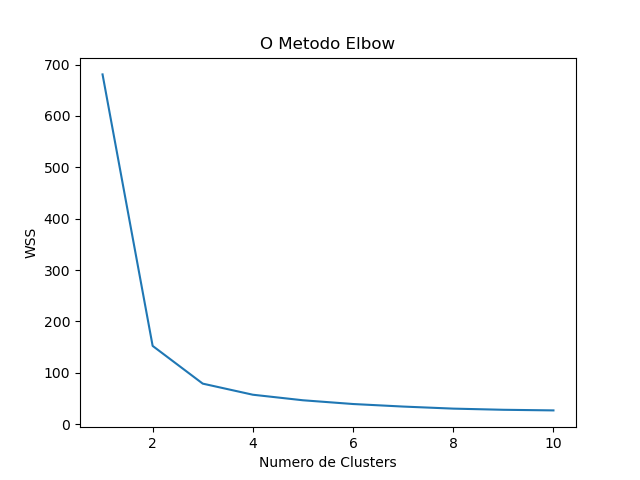

In [27]:
%matplotlib notebook
wcss = []

for i in range(1, 11):
    kmeans2 = KMeans(n_clusters = i, init = 'random')
    kmeans2.fit(X)
    print (i,kmeans2.inertia_)
    wcss.append(kmeans2.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

## Técnicas de Validação

### Matriz de Confusão

In [28]:
print (pd.crosstab(y,kmeans.labels_, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2  All
Real                    
0        50   0   0   50
1         0  48   2   50
2         0  14  36   50
All      50  62  38  150


### Metricas de classificação

In [29]:
from sklearn import metrics
clusters = ['Cluster 2','Cluster 1','Cluster 0']
print(metrics.classification_report(y,kmeans.labels_,target_names=clusters))

              precision    recall  f1-score   support

   Cluster 2       1.00      1.00      1.00        50
   Cluster 1       0.77      0.96      0.86        50
   Cluster 0       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150

